In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')

In [3]:
print (df.head())

   Choice  A_follower_count  A_following_count  A_listed_count  \
0       0               228                302               3   
1       0             21591               1179             228   
2       0              7310               1215             101   
3       0                20                  7               2   
4       1             45589                862            2641   

   A_mentions_received  A_retweets_received  A_mentions_sent  A_retweets_sent  \
0             0.583979             0.100503         0.100503         0.100503   
1            90.456506            25.798292         5.709329         1.111159   
2            25.503644             9.556347         5.361519         0.591206   
3             7.690824             0.277306         1.331508         0.100503   
4           148.854279            36.998884        27.881768         3.333492   

     A_posts  A_network_feature_1         ...           B_following_count  \
0   0.362150                    2      

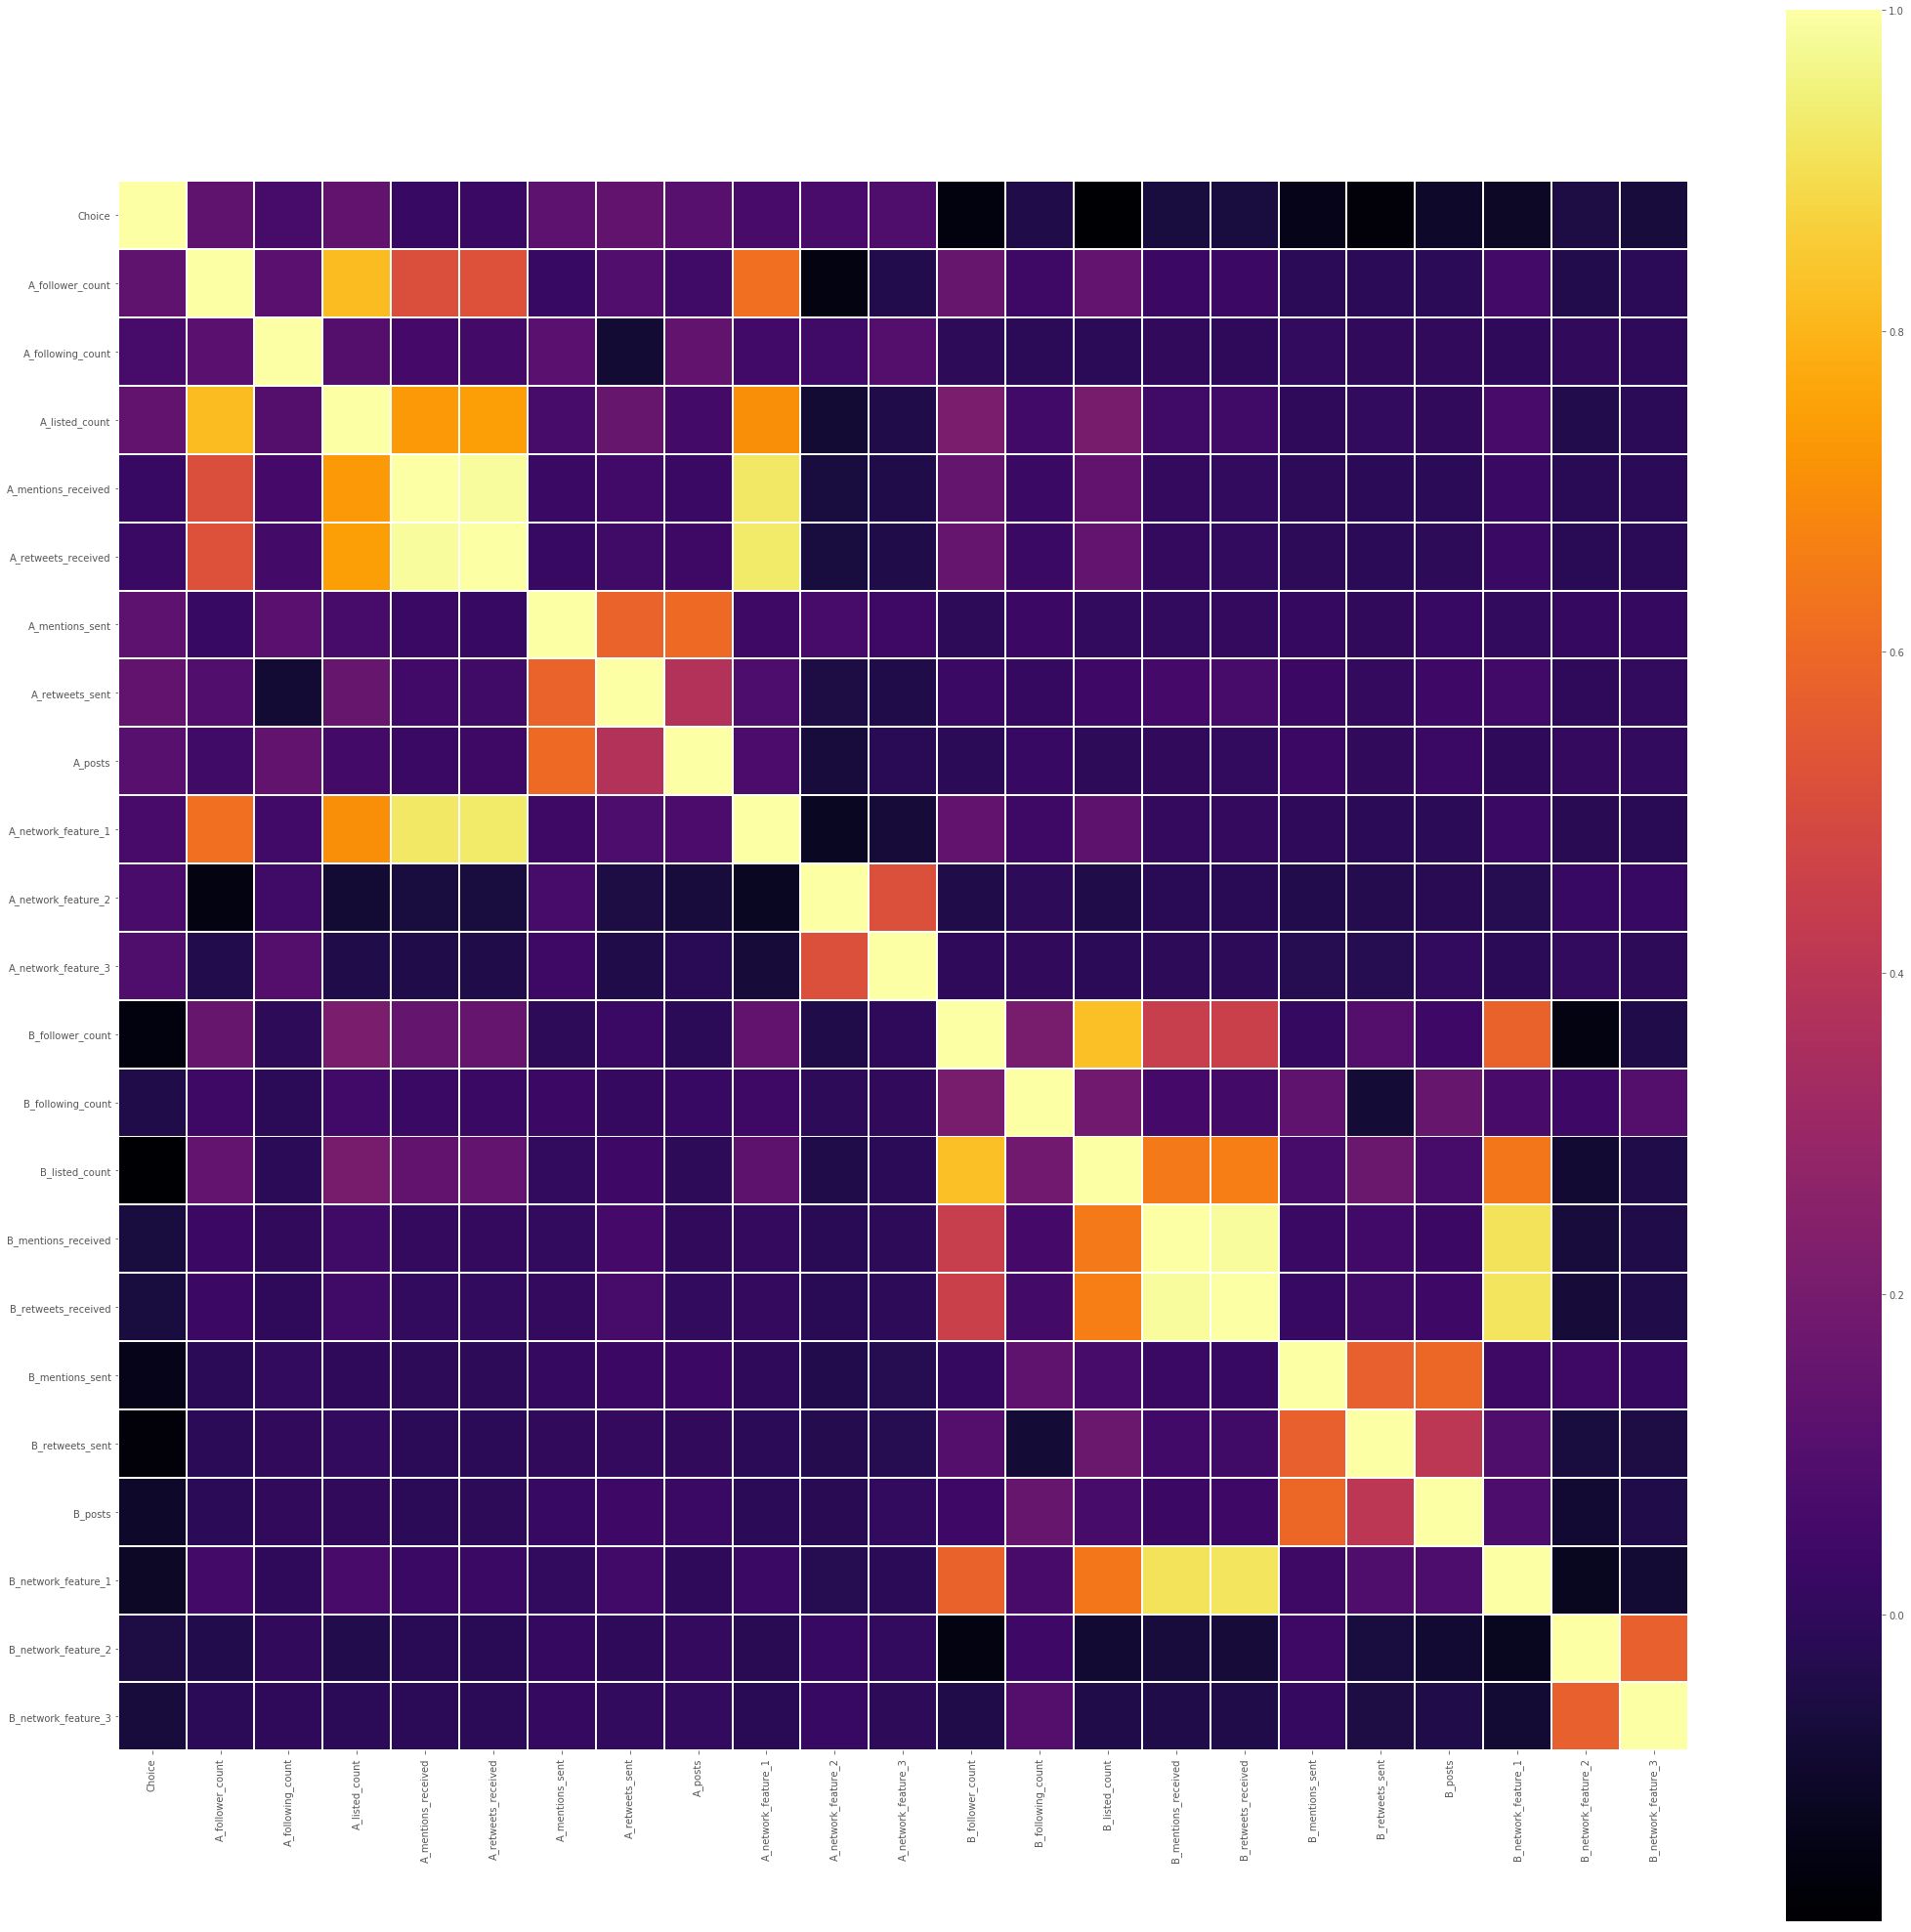

In [4]:
colormap = plt.cm.inferno
plt.figure(figsize=(36,36))
corr =df.select_dtypes(include = ['float64', 'int64']).iloc[:, 0:].corr()
sns.heatmap(corr,linewidths=1.0,vmax=1.0, square=True, cmap=colormap,linecolor='white',)
plt.show()


In [5]:
Y=df['Choice']

In [8]:
df.drop(['Choice',], 1, inplace=True)

In [9]:
X=preprocessing.scale(df)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [11]:
estimator=RandomForestClassifier(n_estimators=500,random_state=0)

In [12]:
estimator.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
y_pred = estimator.predict(X_test)
y_tpred= estimator.predict(X_train)

In [14]:
print ("Accuracy is ", accuracy_score(y_train,y_tpred)*100)
print ("Val Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  99.2727272727
Val Accuracy is  77.0


In [15]:
df1=pd.read_csv('test.csv')

In [16]:
X1=preprocessing.scale(df1)

In [17]:
k=estimator.predict_proba(X1)
f=[]
g=[]
c=0
for i in k:
    f.append(i[0])
    c+=1
    g.append(c)

submission = pd.DataFrame({"Id": g,"Choice":f})
submission.to_csv('submitx.csv',index = False)